# Name:Padarthy Yagnesh Sai
# Question-2
Implement Principal Component Analysis (PCA) using any data set of your choice. The output should include Accuracy, Error rate, Precision, and recall rate along with the confusion matrix.

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [144]:
from sklearn.datasets import load_digits
dataset = pd.DataFrame(load_digits().data)

In [146]:
dataset["target"] = load_digits().target

In [147]:
dataset.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,       10,       11,       12,       13,
             14,       15,       16,       17,       18,       19,       20,
             21,       22,       23,       24,       25,       26,       27,
             28,       29,       30,       31,       32,       33,       34,
             35,       36,       37,       38,       39,       40,       41,
             42,       43,       44,       45,       46,       47,       48,
             49,       50,       51,       52,       53,       54,       55,
             56,       57,       58,       59,       60,       61,       62,
             63, 'target'],
      dtype='object')

In [148]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [169]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [170]:
X_pca

array([[ -1.25946656,  21.27488244],
       [  7.95761145, -20.76870103],
       [  6.99192303,  -9.95598443],
       ...,
       [ 10.80128347,  -6.96025055],
       [ -4.87209954,  12.42395038],
       [ -0.34438995,   6.36555274]])

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4)

In [172]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [173]:
y_pred = knn.predict(X_test)

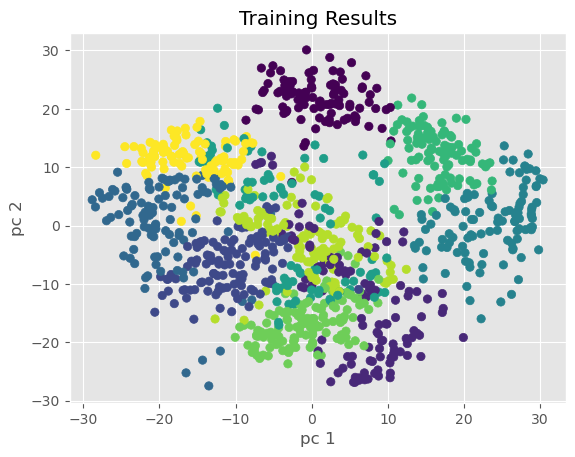

In [174]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
plt.scatter(X_train[:,0],X_train[:,1], c = knn.predict(X_train))
plt.title("Training Results")
plt.xlabel("pc 1")
plt.ylabel("pc 2")
plt.show()

In [175]:
print(f"Accuracy: {accuracy_score(y_train, knn.predict(X_train))} ")
print(f"Confusion Matrix:\n{confusion_matrix(y_train, knn.predict(X_train))}")
print(f"Classification Report Matrix:\n{classification_report(y_train, knn.predict(X_train))}")

Accuracy: 0.7291280148423006 
Confusion Matrix:
[[92  0  0  0  1  4  4  0  0  0]
 [ 0 79  2  0  1  1  0  7 13  1]
 [ 0  3 81  4  0  1  0  0  7  4]
 [ 0  0 13 86  0  1  0  2  4 11]
 [ 0  2  0  0 92  0  8  1  0  0]
 [ 2  5  6  3  1 52  1 12 20  9]
 [ 2  1  0  0 12  0 88  0  0  0]
 [ 0  7  0  1  1  9  0 86  6  0]
 [ 0 11  9  1  0 15  0 17 57  0]
 [ 0  3  5 12  0 15  0  2  9 73]]
Classification Report Matrix:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       101
           1       0.71      0.76      0.73       104
           2       0.70      0.81      0.75       100
           3       0.80      0.74      0.77       117
           4       0.85      0.89      0.87       103
           5       0.53      0.47      0.50       111
           6       0.87      0.85      0.86       103
           7       0.68      0.78      0.73       110
           8       0.49      0.52      0.50       110
           9       0.74      0.61      0.67       

In [176]:
from sklearn.metrics import precision_score, recall_score
print("Precision Score: ", precision_score(y_test,y_pred, average='micro'))

Precision Score:  0.650904033379694


In [177]:
print("Recall Score: ",recall_score(y_test,y_pred,average='micro'))

Recall Score:  0.650904033379694


In [178]:
print("Error Rate is: ", 1-accuracy_score(y_test,y_pred))

Error Rate is:  0.34909596662030595
